In [66]:
%load_ext autoreload
%autoreload 2
from utils import *
#import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import sys
sys.argv[1] = "1"

In [71]:
sys.argv[2] = "1"

In [67]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

In [39]:
a = np.array([1., 3. , 4.])
a.astype(int)

array([1, 3, 4])

[3099, 4470, 4446, 3146, 4598, 3462, 739, 2861, 4318, 1100, 2411, 4874, 3789, 4882, 2099, 2871, 1632, 2520, 2632, 190, 2820, 1323, 177, 2088, 3999, 3074, 1728, 2546, 1646, 69, 3378, 853, 920, 1656, 2428, 4111, 4152, 3556, 2771, 3640, 3779, 1897, 602, 2348, 3803, 3930, 239, 4413, 783, 244, 4522, 3607, 2729, 3100, 2313, 963, 967, 3466, 1043, 45, 2511, 2307, 2570, 2143, 1306, 619, 1769, 63, 3726, 38, 1425, 3072, 2665, 310, 3690, 3709, 265, 4512, 1392, 874, 1027, 2065, 1920, 4614, 4885, 4571, 525, 1829, 1029, 2804, 2078, 4542, 4867, 3938, 454, 2591, 448, 4592, 4940, 4027, 2324, 1676, 4869, 169, 4229, 4647, 4933, 3029, 1880, 2186, 621, 3815, 4557, 2444, 3464, 728, 2731, 3540, 60, 4006, 3067, 2628, 1873, 3217, 2774, 2241, 3425, 2355, 673, 2370, 432, 885, 1896, 2625, 3908, 1884, 98, 3877, 1048, 3863, 1108, 3869, 1221, 387, 4462, 888, 1696, 1538, 1725, 4074, 1692, 4846, 3895, 4210, 2777, 4190, 2659, 3285, 1498, 409, 4401, 1793, 1921, 4502, 25, 1204, 1565, 2177, 1870, 4632, 2293, 4035, 3503, 95

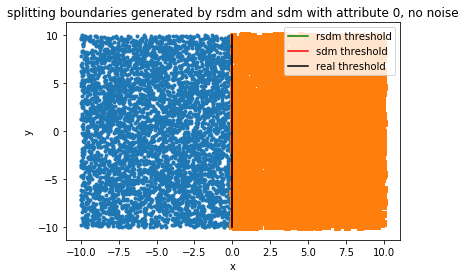

In [76]:
set2_10_0, t = utils.generate_2Ddataset(0, 2, 10000, 0., 0.1, [[-10, 10], [-10, 10]], use_seed = True)
t1, h1 = utils.discretize(rsdm, set2_10_0, 0)
t2, h2 = utils.discretize(sdm, set2_10_0, 0)
utils.display_discretizations_comparison(set2_10_0, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, no noise", "rsdm threshold", "sdm threshold")

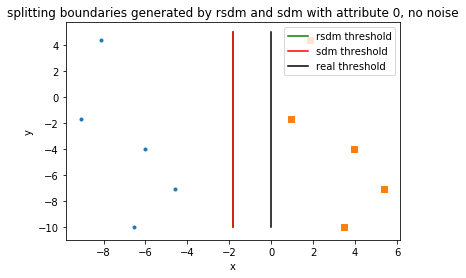

In [73]:
set2_10_0, t = utils.generate_2Ddataset(0, 2, 10, 0., 0.1, [[-10, 10], [-10, 10]], use_seed = True)
t1, h1 = utils.discretize(rsdm, set2_10_0, 0)
t2, h2 = utils.discretize(sdm, set2_10_0, 0)
utils.display_discretizations_comparison(set2_10_0, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, no noise", "rsdm threshold", "sdm threshold")

In [22]:
dataset, t = generate_2Ddataset(0, 2, 100, 0, 0.1, [[-10, 10], [-10, 10]])

for k in range(int(sys.argv[2])):
    dataset = add_noise(dataset, 0.05)

sets = get_ten_folds(dataset)

acc1 = 0
leaves1 = 0
depth1 = 0
ratio1 = 0
pairs1 = 0

acc2 = 0
leaves2 = 0
depth2 = 0
ratio2 = 0
pairs2 = 0

acc3 = 0
leaves3 = 0
depth3 = 0
ratio3 = 0
pairs3 = 0


for i in range(10):
    test_set = sets[i]
    train_set = LabeledSet(2)
    for j in range(10):
        if i != j:
            train_set.addExamples(sets[j].x, sets[j].y)
    tree1 = RDMT(rsdm, "shannon", 0, 100, 0.01, [1, 2])
    tree1.train(train_set)
    acc1 += tree1.accuracy(test_set)
    leaves1 += tree1.get_nb_leaves()
    depth1 += tree1.get_depth()
    ratio1 += tree1.get_ratio_non_monotone_pairs()
    pairs1 += tree1.get_total_pairs()

    tree2 = RDMT(sdm, "shannon", 0, 100, 0.01, [1, 2])
    tree2.train(train_set)
    acc2 += tree2.accuracy(test_set)
    leaves2 += tree2.get_nb_leaves()
    depth2 += tree2.get_depth()
    ratio2 += tree2.get_ratio_non_monotone_pairs()
    pairs2 += tree2.get_total_pairs()

    tree3 = RDMT(prdm, "shannon", 0, 100, 0.01, [1, 2])
    tree3.train(train_set)
    acc3 += tree3.accuracy(test_set)
    leaves3 += tree3.get_nb_leaves()
    depth3 += tree3.get_depth()
    ratio3 += tree3.get_ratio_non_monotone_pairs()
    pairs3 += tree3.get_total_pairs()

acc1 = acc1 * (1.0/10)
depth1 = depth1 * (1.0/10)
ratio1 = ratio1 * (1.0/10)
pairs1 = pairs1 * (1.0/10)

acc2 = acc2 * (1.0/10)
leaves2 = leaves2 * (1.0/10)
depth2 = depth2 * (1.0/10)
ratio2 = ratio2 * (1.0/10)
pairs2 = pairs2 * (1.0/10)

acc3 = acc3 * (1.0/10)
leaves3 = leaves3 * (1.0/10)
depth3 = depth3 * (1.0/10)
ratio3 = ratio3 * (1.0/10)
pairs3 = pairs3 * (1.0/10)

In [23]:
print(acc1, depth1, ratio1, pairs1)
print(acc2, depth2, ratio2, pairs2)
print(acc3, depth3, ratio3, pairs3)

0.9800000000000001 4.9 0.9 1.9000000000000001
0.9700000000000002 5.6000000000000005 0.8544444444444445 1.0
0.9500000000000002 4.7 0.6511111111111112 1.9000000000000001


[3]
[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]]
[3, 1]
[[1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]]
[3, 1, 0]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 

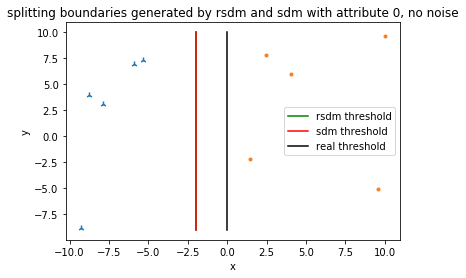

In [8]:
set2_10_0, t = generate_2Ddataset(0, 2, 10, 0.3, 0.1, [[-10, 10], [-10, 10]], use_seed = False)
t1, h1 = discretize(rsdm, set2_10_0, 0)
t2, h2 = discretize(sdm, set2_10_0, 0)
display_discretizations_comparison(set2_10_0, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, no noise", "rsdm threshold", "sdm threshold")


In [62]:
set2_10_0.x

array([[-0.44937959,  2.99001267],
       [-9.1245126 , -0.22181508],
       [ 3.10791226,  7.05693224],
       [ 5.80379704,  5.73482839]])